In [120]:
import random
import time
random.seed(time.time())

class Group(object):##the class of a group which could be a country or state
    infect_rate=0
    infect_num=0
    death_num=0
    cure_num=0
    def __init__(self,population,gdp,cal_out=None,iteration_function=None):
        self.population=population
        self.heathy_num=population
        self.gdp=gdp
        self.cal_out=cal_out
        self.iteration_function=iteration_function
    def get_out(self):##can cal the per time out population which will be (population,infect_num)
        tmp_total_num=self.cal_out(self.population,self.gdp)
        self.population-=tmp_total_num
        infect_people=0
        for x in range(tmp_total_num):
            if random.random() < self.infect_rate:
                infect_people+=1
        self.infect_num-=infect_people
        self.infect_rate=self.infect_num/self.rest_population()
        return tmp_total_num,infect_people
    def get_in(self,args):##by get in the data of (population,infect_num) can change the state
        self.infect_num+=args[1]
        self.population+=args[0]
        self.infect_rate=self.infect_num/self.rest_population()
        return self.infect_rate
    def next_day(self):##call this function you can get the next day state of the instance
        init=[self.infect_num,self.heathy_num,self.death_num,self.cure_num]
        (self.infect_num,self.heathy_num,self.death_num,self.cure_num)=self.iteration_function(init)
        self.infect_rate=self.infect_num/self.rest_population()
    def rest_population(self):
        return self.population - self.death_num
    def set_infect_init_rate(self,init_rate):
        self.infect_rate=init_rate
        self.infect_num=self.infect_rate*self.population

In [121]:
class Node(object):##similar to link list
    def __init__(self,group,next_group=None):
        self.group=group
        self.next_group=next_group
    def next_group(self):
        return next_group

In [122]:
from scipy.integrate import odeint   
import numpy as np 
t = np.arange(0,200,1)  
def lorenz(w, t, a, b, c,d):
    x,y,z,k=w
    return np.array([a*x*y/d-b*x-c*x,-a*x*y/d,b*x,c*x])
track1 = odeint(lorenz, (10,10000000 , 0.0,0.0), t, args=(3*10**(-7),0.35,0.35,1))#(a,p,y,s)
print(track1)


[[ 1.00000000e+01  1.00000000e+07  0.00000000e+00  0.00000000e+00]
 [ 9.97406947e+01  9.99988295e+06  1.36562969e+01  1.36562969e+01]
 [ 9.94684341e+02  9.99871560e+06  1.49855822e+02  1.49855822e+02]
 [ 9.90615629e+03  9.98708943e+06  1.50720616e+03  1.50720616e+03]
 [ 9.73324817e+04  9.87280935e+06  1.49340861e+04  1.49340861e+04]
 [ 8.44066147e+05  8.87834820e+06  1.38797828e+05  1.38797828e+05]
 [ 3.50701297e+06  4.76171875e+06  8.65639135e+05  8.65639135e+05]
 [ 4.01125636e+06  1.39826715e+06  2.29524325e+06  2.29524325e+06]
 [ 2.57448349e+06  5.17997738e+05  3.45376439e+06  3.45376439e+06]
 [ 1.43312481e+06  2.87765595e+05  4.13955980e+06  4.13955980e+06]
 [ 7.65305908e+05  2.08964926e+05  4.51286958e+06  4.51286958e+06]
 [ 4.02390205e+05  1.76384843e+05  4.71061748e+06  4.71061748e+06]
 [ 2.10148567e+05  1.61394991e+05  4.81423322e+06  4.81423322e+06]
 [ 1.09400017e+05  1.54091519e+05  4.86825923e+06  4.86825923e+06]
 [ 5.68619634e+04  1.50424101e+05  4.89636197e+06  4.89636197e

In [123]:
def population_infect_health_death_cure(init,**kw):
    t = np.arange(0,1,1/7)  
    def lorenz(w, t, a, b, c,d):
        x,y,z,k=w
        return np.array([a*x*y/d-b*x-c*x,-a*x*y/d,b*x,c*x])
    track1 = odeint(lorenz, init,t, args=kw['args'])#(a,p,y,s)
    return track1[1,:]

In [124]:
import pickle
#3*10**(-7) 0.05 0.05  1
list_coeffience=(3*10**(-7),0.35,0.35,1)
def cal_out(population,gdp):
    return 100
def iteration_function(args):
    return population_infect_health_death_cure(args,args=list_coeffience)
guinea=Group(12.4*10**6,2039,cal_out,iteration_function)
node_guinea=Node(guinea)
guinea_porpotion=245860*10**6
liberia=Group(4503000,897,cal_out,iteration_function)
node_liberia=Node(liberia)
liberia_porpotion=111369*10**6
sierra_leone=Group(7075641,1848,cal_out,iteration_function)
node_sierra_leone=Node(sierra_leone)
sierra_leone_porpotion=71740*10**6
###

dict_country={'guinea':node_guinea,'liberia':node_liberia,'sierra_leone':node_sierra_leone}
dict_country['guinea'].next_group=Node(liberia,sierra_leone)
dict_country['liberia'].next_group=Node(guinea,sierra_leone)
dict_country['sierra_leone'].next_group=Node(guinea,liberia)


In [125]:
axis_x=[]
axis_y=[]
dict_axis_y={}
for country in dict_country:
    dict_axis_y[country]=[]

In [126]:
for x in range(5*30*3):
    dict_country['guinea'].group.set_infect_init_rate(0.001)
    axis_x.append(x)
    #dict_country['liberia'].group.infect_rate=0.1
    #dict_country['sierra_leone'].group.infect_rate=0.01
    for country in dict_country:
        for related_country in dict_country:
            if country!=related_country:
                dict_country[country].group.get_in(dict_country[related_country].group.get_out())
        dict_country[country].group.next_day()
        dict_axis_y[country].append(dict_country[country].group.rest_population())
        if(x%30==0):
            print('the population of %s : %f;infect_rate : %f' % (country
                                                                  ,dict_country[country].group.rest_population()
                                                                  ,dict_country[country].group.infect_rate))
        
    

the population of guinea : 12399424.801792;infect_rate : 0.001539
the population of liberia : 4503100.000000;infect_rate : 0.000000
the population of sierra_leone : 7075641.000000;infect_rate : 0.000000
the population of guinea : 12376236.235239;infect_rate : 0.001526
the population of liberia : 4503097.587081;infect_rate : 0.000002
the population of sierra_leone : 7075456.377870;infect_rate : 0.000106
the population of guinea : 12353174.492286;infect_rate : 0.001514
the population of liberia : 4503010.534794;infect_rate : 0.000044
the population of sierra_leone : 6997402.530108;infect_rate : 0.043220
the population of guinea : 12330187.874165;infect_rate : 0.001505
the population of liberia : 4500216.034053;infect_rate : 0.001365
the population of sierra_leone : 4740623.425670;infect_rate : 0.305406
the population of guinea : 12307343.556415;infect_rate : 0.001491
the population of liberia : 4450406.938995;infect_rate : 0.021271
the population of sierra_leone : 3835048.959357;infect_r

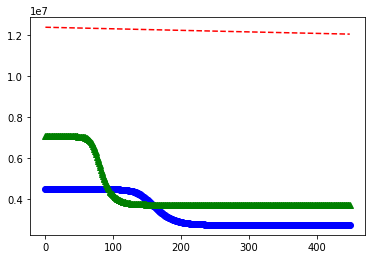

In [127]:
import numpy as np  
import matplotlib.pyplot as plt  
# evenly sampled time at 200ms intervals   
# red dashes, blue squares and green triangles  
plt.plot(axis_x, dict_axis_y['guinea'], 'r--', axis_x, dict_axis_y['liberia'], 'bo', axis_x, dict_axis_y['sierra_leone'], 'g^')  
plt.show()  